# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스

In [22]:
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy

In [23]:
import numpy as np  # numpy 모듈을 np라는 별칭으로 임포트합니다. numpy는 고성능 수치 계산을 위한 라이브러리로, 배열 및 행렬 연산에 유용합니다.

# 'fruits_300.npy' 파일에서 데이터 배열을 로드합니다.
fruits = np.load('fruits_300.npy')  # 파일에서 데이터를 로드하여 fruits 변수에 저장합니다. 이 배열은 300개의 100x100 픽셀 이미지를 포함하고 있습니다.

# 데이터를 2차원 배열로 변환합니다.
fruits_2d = fruits.reshape(-1, 100 * 100)  # 원래 3차원 배열 (300, 100, 100)을 2차원 배열 (300, 10000)로 변환합니다. 각 이미지가 1차원 벡터로 펼쳐집니다.


In [24]:
from sklearn.decomposition import PCA  
# sklearn.decomposition 모듈에서 PCA 클래스를 임포트합니다. PCA는 주성분 분석(Principal Component Analysis)을 위한 클래스입니다.

pca = PCA(n_components=50)  
# 주성분 분석 객체를 생성합니다. n_components=50으로 설정하여 데이터의 50개의 주성분을 추출하도록 지정합니다.

pca.fit(fruits_2d)  
# fruits_2d 데이터에 주성분 분석을 수행합니다. 이 과정에서 PCA는 데이터의 분산을 최대화하는 50개의 주성분을 찾습니다.


PCA(n_components=50)

In [25]:
print(pca.components_.shape)

(50, 10000)


In [26]:
import matplotlib.pyplot as plt  
# matplotlib.pyplot 모듈을 plt라는 별칭으로 임포트합니다. 이 모듈은 2D 플롯을 생성하는 데 사용됩니다.

def draw_fruits(arr, ratio=1):
    """
    주어진 이미지 배열을 시각화하는 함수입니다.
    """
    n = len(arr)  # n은 이미지 배열의 샘플 개수를 나타냅니다.
    
    # 한 줄에 10개씩 이미지를 배치하기 위해 전체 행의 개수를 계산합니다.
    # n을 10으로 나누어 올림하여 전체 행의 개수를 결정합니다.
    rows = int(np.ceil(n / 10))
    
    # 행의 개수가 1개라면, 열의 개수는 이미지 개수(n)와 같아야 합니다.
    # 그렇지 않다면, 열의 개수는 최대 10개로 고정합니다.
    cols = n if rows < 2 else 10
    
    # 서브플롯을 생성합니다. figsize는 그림의 크기를 조정하는 인수입니다.
    # squeeze=False로 설정하면, 서브플롯 배열을 2D 배열로 반환받습니다.
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    
    # 각 서브플롯을 반복하여 이미지를 표시합니다.
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:  # 배열의 개수(n)보다 작을 때만 이미지를 그립니다.
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')  # 이미지를 그리기 위한 함수입니다.
            axs[i, j].axis('off')  # 축을 숨겨서 이미지가 더 깔끔하게 보이도록 합니다.
    
    plt.show()  # 최종적으로 시각화된 이미지를 화면에 표시합니다.


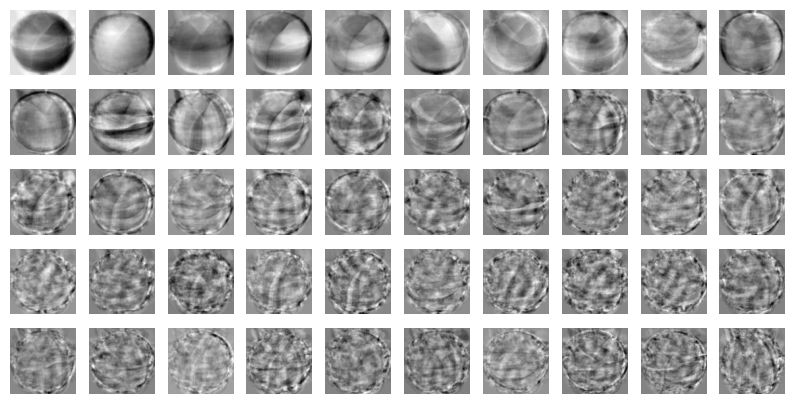

In [27]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [28]:
print(fruits_2d.shape)

(300, 10000)


In [29]:
fruits_pca = pca.transform(fruits_2d)

In [30]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [39]:
# PCA 변환된 데이터를 원래의 데이터 공간으로 복원합니다.
fruits_inverse = pca.inverse_transform(fruits_pca)  
# pca.inverse_transform() 메서드를 사용하여 PCA로 변환된 데이터(fruits_pca)를 원래의 공간으로 복원합니다.

print(fruits_inverse.shape)  # 복원된 데이터의 형상을 출력합니다. 원래 데이터와 동일한 형상이어야 합니다.

(300, 10000)


In [41]:
# PCA를 통해 원래의 데이터 공간으로 복원된 데이터를 원래의 이미지 형태로 재구성합니다.
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)  
# fruits_inverse 배열을 (샘플 개수, 100, 100) 형태로 변형하여 원래 이미지 형태로 복원합니다.

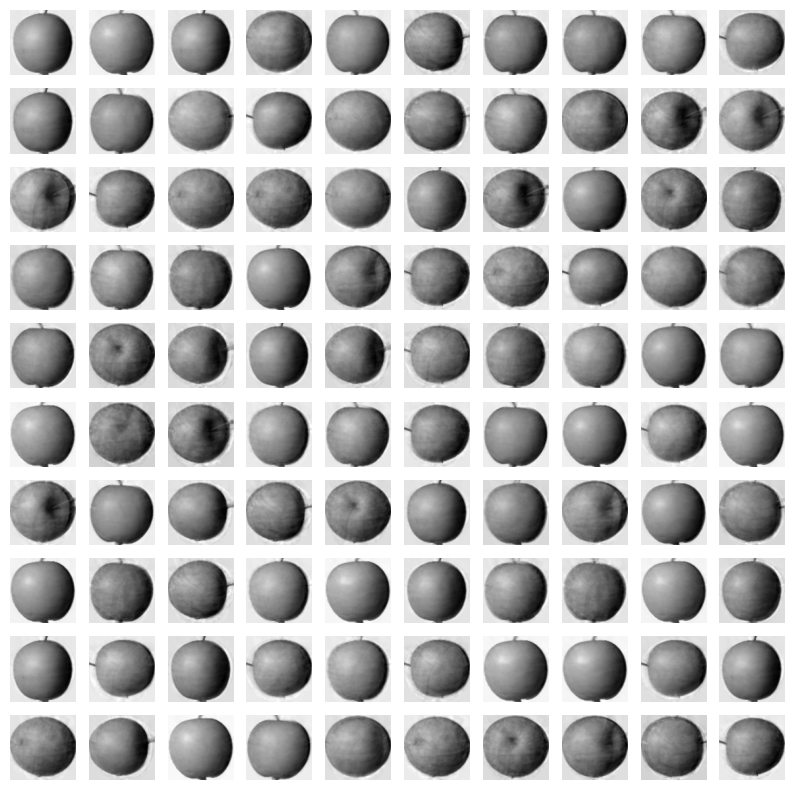

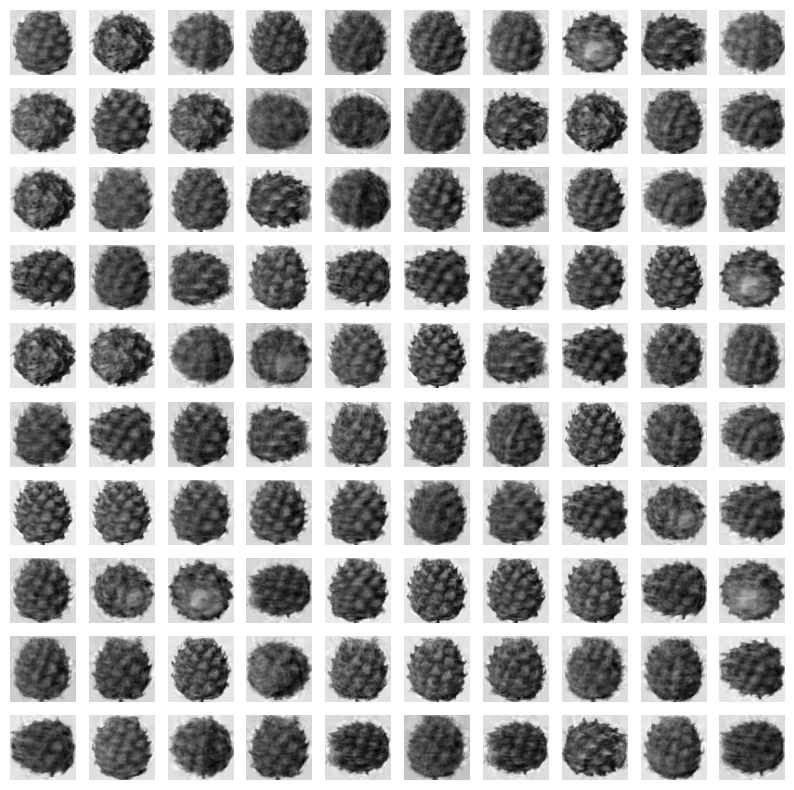

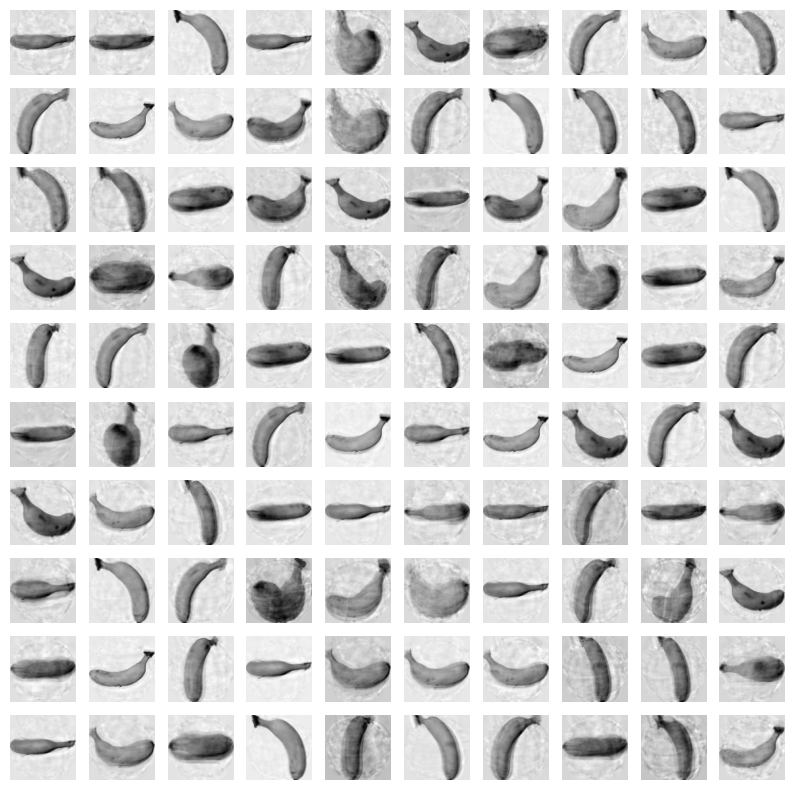

In [43]:
for start in [0, 100, 200]:
    # fruits_reconstruct 배열에서 'start' 인덱스부터 100개의 이미지를 추출합니다.
    draw_fruits(fruits_reconstruct[start:start+100])
    # 각 시각화 후에 빈 줄을 출력합니다. 화면에서 구분을 명확히 하기 위함입니다.
    print("\n")

## 설명된 분산

In [52]:
print(np.sum(pca.explained_variance_ratio_))  
# PCA로 변환된 데이터의 주성분들이 설명하는 전체 분산 비율의 합계를 출력합니다.

0.9215421065952293


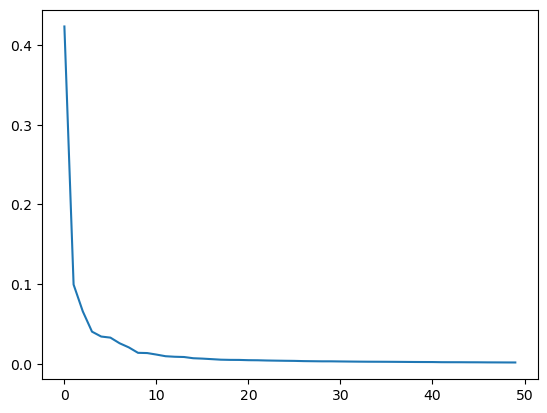

In [53]:
plt.plot(pca.explained_variance_ratio_)

In [54]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480347,
       0.00447837, 0.00437317, 0.00408042, 0.00389469, 0.00372444,
       0.00359284, 0.00331418, 0.00317803, 0.00304332, 0.00303746,
       0.00288758, 0.00275909, 0.00264933, 0.00255881, 0.00251953,
       0.00247062, 0.00239455, 0.002309  , 0.00222062, 0.00216595,
       0.00213958, 0.00195871, 0.00192567, 0.00191188, 0.00184516,
       0.00181252, 0.00172212, 0.00168456, 0.00163085, 0.0015988 ])

In [55]:
# 차원 축소 후에도 모델의 성능이 줄어들지 않는지 검증 

## 다른 알고리즘과 함께 사용하기

In [56]:
from sklearn.linear_model import LogisticRegression  
# sklearn.linear_model 모듈에서 LogisticRegression 클래스를 임포트합니다.

lr = LogisticRegression()  
# LogisticRegression 클래스의 인스턴스를 생성하여 lr 변수에 저장합니다.


In [58]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)  
# 0, 1, 2로 구성된 레이블 배열을 생성합니다.

In [59]:
from sklearn.model_selection import cross_validate  # 교차 검증 함수 cross_validate를 임포트합니다.

# 교차 검증을 수행하여 성능 평가 점수와 모델 훈련 시간을 포함한 결과를 얻습니다.
scores = cross_validate(lr, fruits_2d, target)

# 교차 검증의 테스트 점수(test_score)의 평균을 계산하고 출력합니다.
print(np.mean(scores['test_score']))  # 모델의 평균 테스트 정확도를 출력합니다.

# 교차 검증 동안의 모델 훈련 시간(fit_time)의 평균을 계산하고 출력합니다.
print(np.mean(scores['fit_time']))  # 모델 훈련에 소요된 평균 시간을 출력합니다.


0.9966666666666667
0.14902653694152831


In [62]:
# PCA로 변환된 데이터(fruits_pca)와 레이블(target)을 사용하여 로지스틱 회귀 모델(lr)에 대해 교차 검증을 수행합니다.
scores = cross_validate(lr, fruits_pca, target)

# 교차 검증의 테스트 점수(test_score)의 평균을 계산하여 출력합니다.
print(np.mean(scores['test_score']))  # 모델의 평균 테스트 정확도를 출력합니다.

# 교차 검증 동안의 모델 훈련 시간(fit_time)의 평균을 계산하여 출력합니다.
print(np.mean(scores['fit_time']))  # 모델 훈련에 소요된 평균 시간을 출력합니다.


0.9966666666666667
0.005923032760620117


In [64]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [65]:
print(pca.n_components_)

2


In [66]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [67]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.014604425430297852


c:\ProgramData\anaconda3\envs\practice_mldl\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\envs\practice_mldl\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [69]:
from sklearn.cluster import KMeans  # KMeans 클러스터링 알고리즘을 임포트합니다.

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3, random_state=42)

# PCA로 변환된 데이터(fruits_pca)를 사용하여 KMeans 모델을 학습시킵니다.
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [70]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


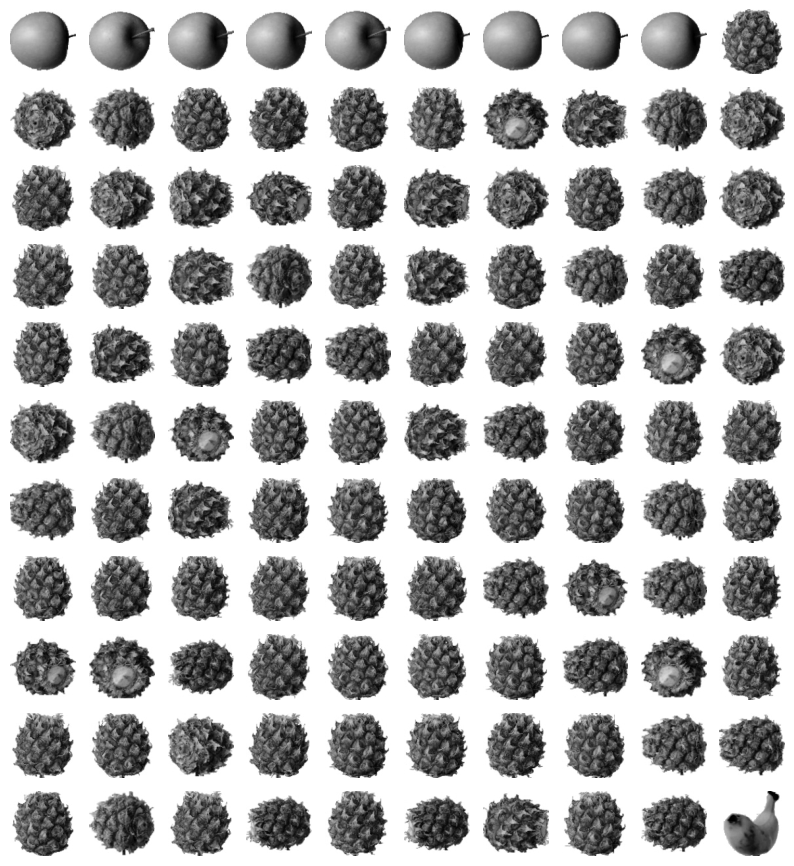

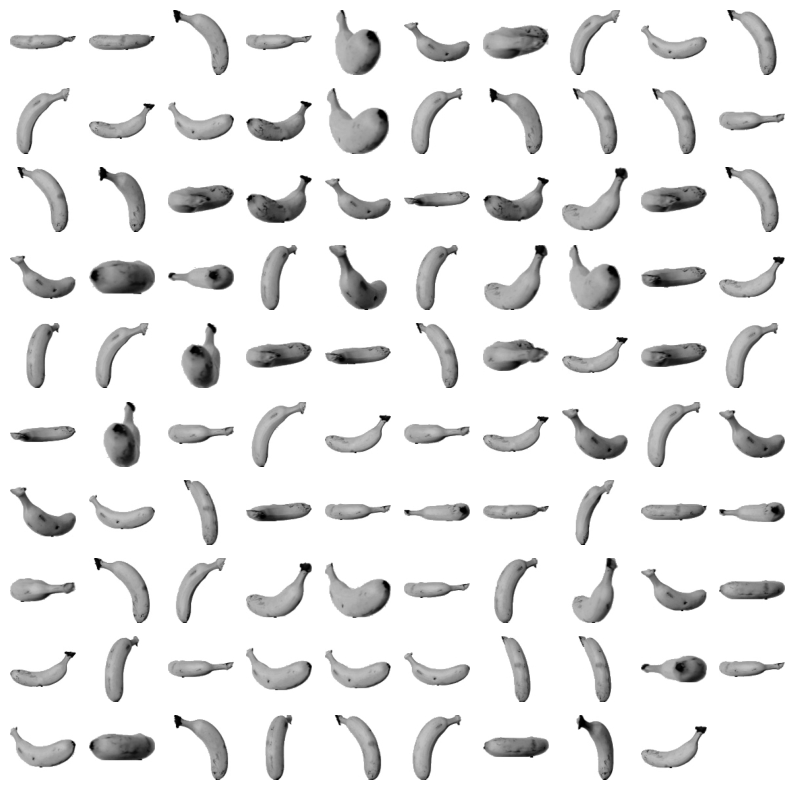

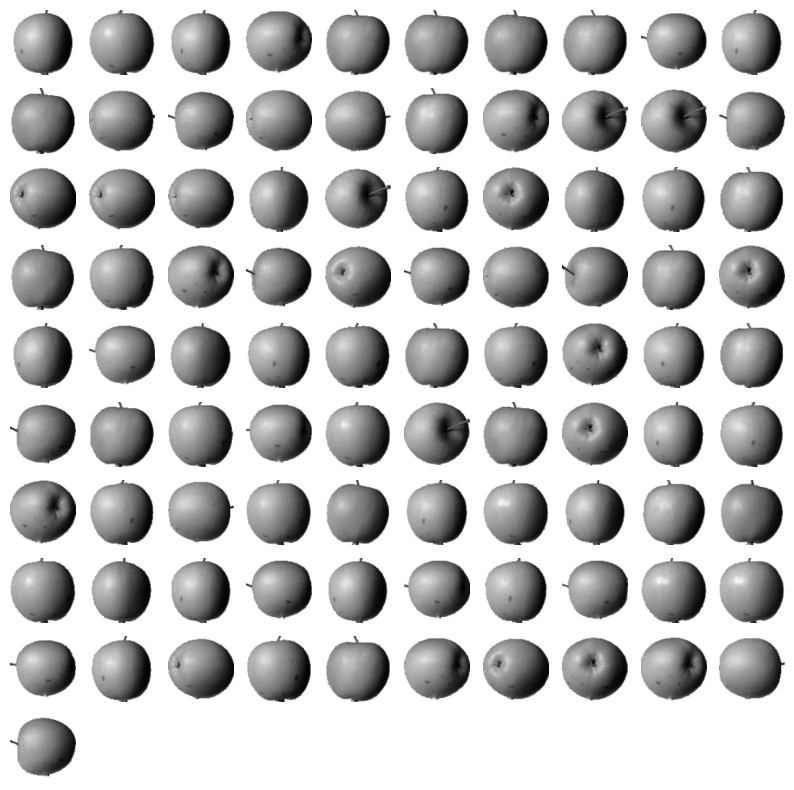

In [71]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

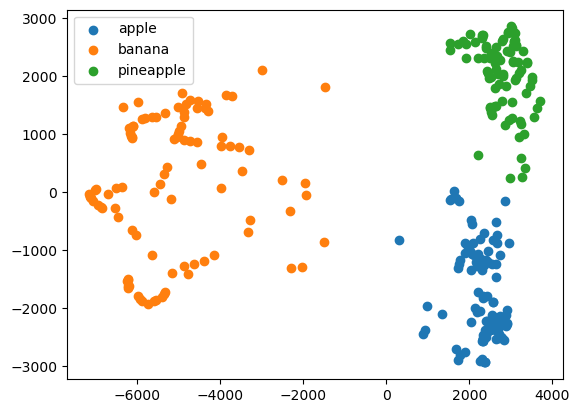

In [72]:
# KMeans 클러스터링의 결과를 시각화
for label in range(0, 3):
    # 특정 클러스터(label)에 속하는 데이터만 추출
    data = fruits_pca[km.labels_ == label]
    
    # 클러스터에 속한 데이터들을 2D 평면에 산점도로 표시
    plt.scatter(data[:, 0], data[:, 1])

# 각 클러스터에 대해 범례 추가
plt.legend(['apple', 'banana', 'pineapple'])

# 그래프를 화면에 출력
plt.show()


In [74]:
# 6-3 문제 
'''

1. 특성이 20개인 대량의 데이터셋이 있습니다. 이 데이터셋에서 찾을수 있는 주성분 개수는 몇개? 20개
이유: PCA(주성분 분석)는 특성 공간의 차원을 축소하는 기법이며, 원래의 특성 개수만큼 주성분을 찾을 수 있습니다. 
이 경우 주성분의 개수는 원래 데이터의 특성 개수(즉, 20개)를 넘을 수 없습니다.

2. 샘플 개수가 1000개이고, 특성개수는 100개인 데이터셋이 있다. 즉 이데이터셋의 (1000,100)입니다. 
이 데이터를 사이킷런의 pca 클래스를 사용해 10개의 주성분을 찾아 변환했습니다. 변환된 데이터셋의 크기는 얼마인가요?
샘플 개수가 1000개이고 특성 개수가 100개인 데이터셋에서 10개의 주성분을 찾았다면, 
변환된 데이터셋의 크기는 **(1000, 10)**입니다.
이유: PCA는 원래 데이터의 특성을 주성분으로 변환합니다. 
여기서 10개의 주성분을 선택했으므로, 각 샘플은 10개의 새로운 특성으로 표현됩니다. 
따라서 변환된 데이터셋의 크기는 1000개의 샘플과 10개의 주성분으로 이루어져 있습니다.

3. 2번 문제에서 설명된 분산이 가장 큰 주성분은 몇번째인가요?
분산이 가장 큰 주성분은 첫 번째 주성분입니다.
이유: PCA는 분산이 가장 큰 방향으로 첫 번째 주성분을 선택합니다. 
첫 번째 주성분은 데이터의 최대 분산을 설명하며, 가장 많은 정보(분산)를 포함합니다. 
이후 주성분들은 첫 번째 주성분과 직교하며, 점차적으로 더 적은 분산을 설명합니다.

'''

'\n\n1. 특성이 20개인 대량의 데이터셋이 있습니다. 이 데이터셋에서 찾을수 있는 주성분 개수는 몇개? 20개\n이유: PCA(주성분 분석)는 특성 공간의 차원을 축소하는 기법이며, 원래의 특성 개수만큼 주성분을 찾을 수 있습니다. \n이 경우 주성분의 개수는 원래 데이터의 특성 개수(즉, 20개)를 넘을 수 없습니다.\n\n2. 샘플 개수가 1000개이고, 특성개수는 100개인 데이터셋이 있다. 즉 이데이터셋의 (1000,100)입니다. \n이 데이터를 사이킷런의 pca 클래스를 사용해 10개의 주성분을 찾아 변환했습니다. 변환된 데이터셋의 크기는 얼마인가요?\n샘플 개수가 1000개이고 특성 개수가 100개인 데이터셋에서 10개의 주성분을 찾았다면, \n변환된 데이터셋의 크기는 **(1000, 10)**입니다.\n이유: PCA는 원래 데이터의 특성을 주성분으로 변환합니다. \n여기서 10개의 주성분을 선택했으므로, 각 샘플은 10개의 새로운 특성으로 표현됩니다. \n따라서 변환된 데이터셋의 크기는 1000개의 샘플과 10개의 주성분으로 이루어져 있습니다.\n\n3. 2번 문제에서 설명된 분산이 가장 큰 주성분은 몇번째인가요?\n분산이 가장 큰 주성분은 첫 번째 주성분입니다.\n이유: PCA는 분산이 가장 큰 방향으로 첫 번째 주성분을 선택합니다. \n첫 번째 주성분은 데이터의 최대 분산을 설명하며, 가장 많은 정보(분산)를 포함합니다. \n이후 주성분들은 첫 번째 주성분과 직교하며, 점차적으로 더 적은 분산을 설명합니다.\n\n'